<a href="https://colab.research.google.com/github/VineetRoy1106/Text-Summarization-using-LLM/blob/main/Text_summarization_with_4_LLM's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [65]:
!pip install py-rouge
!pip install sacrebleu
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=309fd6c76bddfb1e95bfc84f5b8d7a351699338a7013c615c05939c2cc639103
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [82]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", version="3.0.0")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [3]:
dataset['train']

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})

In [4]:
dataset['train'][1]['article'][:300]

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many men'

In [5]:
dataset['train'][1]['highlights']

'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .'

# We will be using models like GPT2, T5, BART, PEGASUS

GPT-2

In [48]:
from transformers import pipeline

pipe_1 = pipeline("text-generation", model="gpt2-medium")

In [50]:
dataset['train'][1]['article'][:1000]
input_text = dataset['train'][1]['article'][:2000]

query = input_text + "\nTL;DR:\n"

pipe_out = pipe_1(query, max_length=512, clean_up_tokenization_spaces=True)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [8]:
len(input_text)

2000

In [9]:

pipe_out[0]['generated_text']

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

In [76]:
def baseline_summary_three_sent(text):
    return "\n".join(sent_tokenize(text)[:3])

In [10]:
summaries = {}
summaries['gpt2-medium-380M'] = pipe_out[0]['generated_text'][len(query):]

#  T5 Transformers

In [11]:
pipe = pipeline('summarization', model='t5-base')

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [12]:

pipe_out = pipe(input_text)

In [13]:
summaries['t5-base-223M'] = pipe_out[0]['summary_text']

# BART model

In [14]:
pipe = pipeline('summarization', model='facebook/bart-large-cnn')
pipe_out = pipe(input_text)



In [15]:
summaries['bart-large-cnn-400M'] = pipe_out[0]['summary_text']

# PEGASUS Model

In [53]:
pipe = pipeline('summarization', model='google/pegasus-cnn_dailymail')

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
pipe_out = pipe(input_text)

In [55]:
summaries['pegasus-cnn-568M'] = pipe_out[0]['summary_text']

In [62]:
print("GROUND TRUTH")

print(dataset['train'][1]['highlights'])


for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])

GROUND TRUTH
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .
GPT2-MEDIUM-380M
- The mental illness and criminalization in Miami-Dade County jail are not uncommon or uncommonly extreme and the level of extreme measures being used to handle people who are mentally ill and the mentally unfit is alarming.
 - According to the Miami-Dade County Sheriff's Office report, the mentally ill inmates made up the largest percent of those arrested on July 1st.

T5-BASE-223M
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won't do w

In [60]:
import numpy as np

SacreBLEU

In [61]:
bleu_metric.add(prediction = [summaries["pegasus-cnn-568M"]], reference = [dataset['train'][1]['highlights'] ])

results = bleu_metric.compute(smooth_method = 'floor', smooth_value = 0 )

results['precision'] = [np.round(p , 2) for p in results['precisions'] ]

pd.DataFrame.from_dict(results, orient = 'index', columns = ['Value'] )

,Value
score,16.876285
counts,"[17, 11, 10, 9]"
totals,"[69, 68, 67, 66]"
precisions,"[24.63768115942029, 16.176470588235293, 14.925..."
bp,1.0
sys_len,69
ref_len,57
precision,"[24.64, 16.18, 14.93, 13.64]"


In [66]:
rouge_metric = load_metric('rouge')
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

reference = dataset['train'][1]['highlights']

records = []

for model_name in summaries:
    rouge_metric.add(prediction = summaries[model_name], reference = reference )
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )
    print('rouge_dict ', rouge_dict )
    records.append(rouge_dict)

pd.DataFrame.from_records(records, index = summaries.keys() )

rouge_dict  {'rouge1': 0.30630630630630634, 'rouge2': 0.055045871559633024, 'rougeL': 0.14414414414414417, 'rougeLsum': 0.28828828828828834}
rouge_dict  {'rouge1': 0.3921568627450981, 'rouge2': 0.13999999999999999, 'rougeL': 0.25490196078431376, 'rougeLsum': 0.31372549019607837}
rouge_dict  {'rouge1': 0.4752475247524753, 'rouge2': 0.22222222222222224, 'rougeL': 0.31683168316831684, 'rougeLsum': 0.39603960396039606}
rouge_dict  {'rouge1': 0.31683168316831684, 'rouge2': 0.20202020202020202, 'rougeL': 0.2772277227722772, 'rougeLsum': 0.31683168316831684}


,rouge1,rouge2,rougeL,rougeLsum
gpt2-medium-380M,0.306306,0.055046,0.144144,0.288288
t5-base-223M,0.392157,0.140000,0.254902,0.313725
bart-large-cnn-400M,0.475248,0.222222,0.316832,0.396040
pegasus-cnn-568M,0.316832,0.202020,0.277228,0.316832


from matplotlib import pyplot as plt
_df_0['rouge1'].plot(kind='hist', bins=20, title='rouge1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rouge2'].plot(kind='hist', bins=20, title='rouge2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['rougeL'].plot(kind='hist', bins=20, title='rougeL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['rougeLsum'].plot(kind='hist', bins=20, title='rougeLsum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='rouge1', y='rouge2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='rouge2', y='rougeL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='rougeL', y='rougeLsum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['rouge1'].plot(kind='line', figsize=(8, 4), title='rouge1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['rouge2'].plot(kind='line', figsize=(8, 4), title='rouge2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['rougeL'].plot(kind='line', figsize=(8, 4), title='rougeL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['rougeLsum'].plot(kind='line', figsize=(8, 4), title='rougeLsum')
plt.gca().spines[['top', 'right']].set_visible(False)

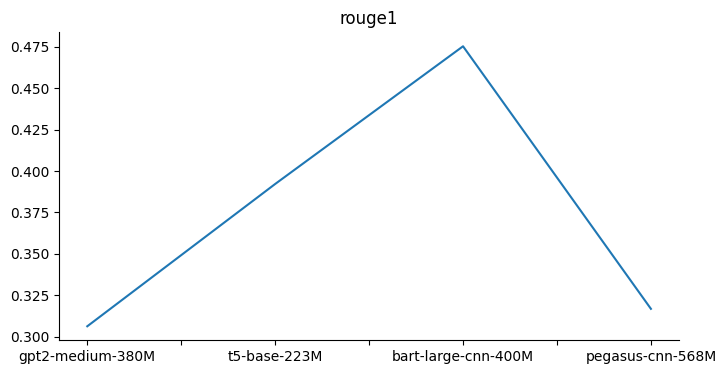

In [89]:
from matplotlib import pyplot as plt
_df_7['rouge1'].plot(kind='line', figsize=(8, 4), title='rouge1')
plt.gca().spines[['top', 'right']].set_visible(False)

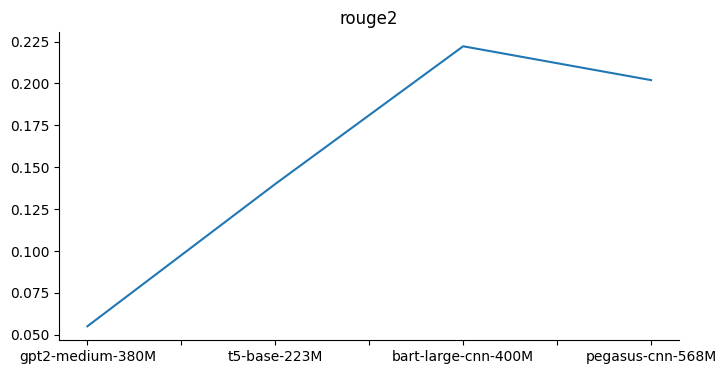

In [90]:
from matplotlib import pyplot as plt
_df_8['rouge2'].plot(kind='line', figsize=(8, 4), title='rouge2')
plt.gca().spines[['top', 'right']].set_visible(False)

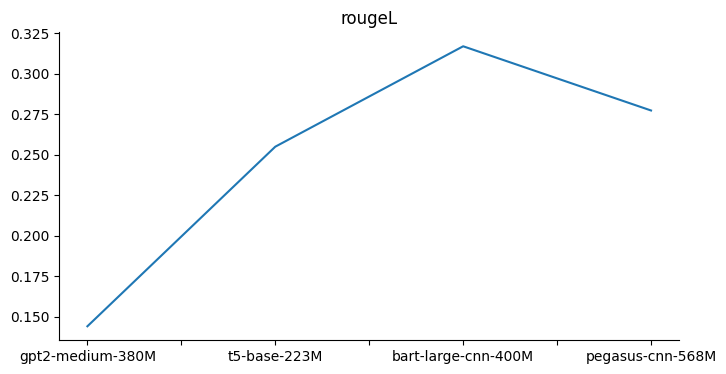

In [91]:
from matplotlib import pyplot as plt
_df_9['rougeL'].plot(kind='line', figsize=(8, 4), title='rougeL')
plt.gca().spines[['top', 'right']].set_visible(False)

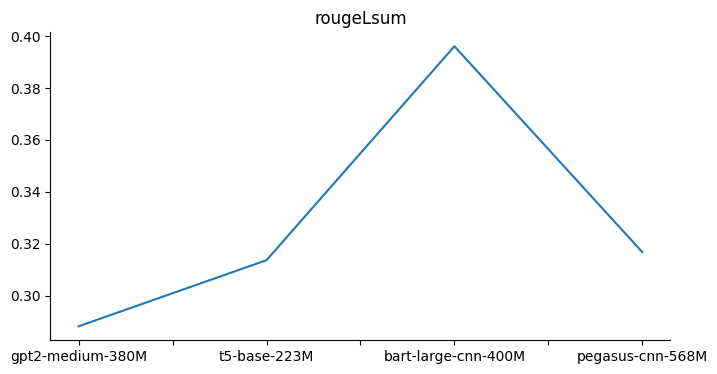

In [88]:
from matplotlib import pyplot as plt
_df_10['rougeLsum'].plot(kind='line', figsize=(8, 4), title='rougeLsum')
plt.gca().spines[['top', 'right']].set_visible(False)

In [83]:
def calculate_metric_on_baseline_test_ds(dataset, metric, column_text = 'article', column_summary = 'highlights' ):
    """
    This function calculates a specified metric on a baseline test dataset for a Natural Language Processing (NLP) task.
    It assumes the task is a text summarization task, where the goal is to generate a summary (e.g., highlights) from a text (e.g., article).

    Parameters:
    dataset (pandas.DataFrame): The test dataset. It should contain a column for the text and a column for the true summary.
    metric (datasets.Metric): The metric to calculate. This should be a metric object from the Hugging Face datasets library.
    column_text (str, optional): The name of the column in the dataset that contains the text. Defaults to 'article'.
    column_summary (str, optional): The name of the column in the dataset that contains the true summary. Defaults to 'highlights'.

    Returns:
    score (float): The calculated score of the metric on the test dataset.
    """
    summaries = [baseline_summary_three_sent(text) for text in dataset[column_text] ]

    metric.add_batch(predictions = summaries, references = dataset[column_summary] )

    score = metric.compute()
    return score

In [87]:
test_sampled = dataset['train'].shuffle(seed = 42).select(range(1000))

score = calculate_metric_on_baseline_test_ds(test_sampled, rouge_metric )

rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame.from_dict(rouge_dict, orient = 'index' , columns = ['baseline'] ).T

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.253995,0.100642,0.165754,0.231571


#Fine-Tuning Summarization Model on Custom Dataset

In [22]:

from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

In [23]:
device = 'gpu'
model_ckpt = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

In [24]:
samsum = load_dataset('samsum')
samsum

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [25]:

samsum['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [26]:
dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]

array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

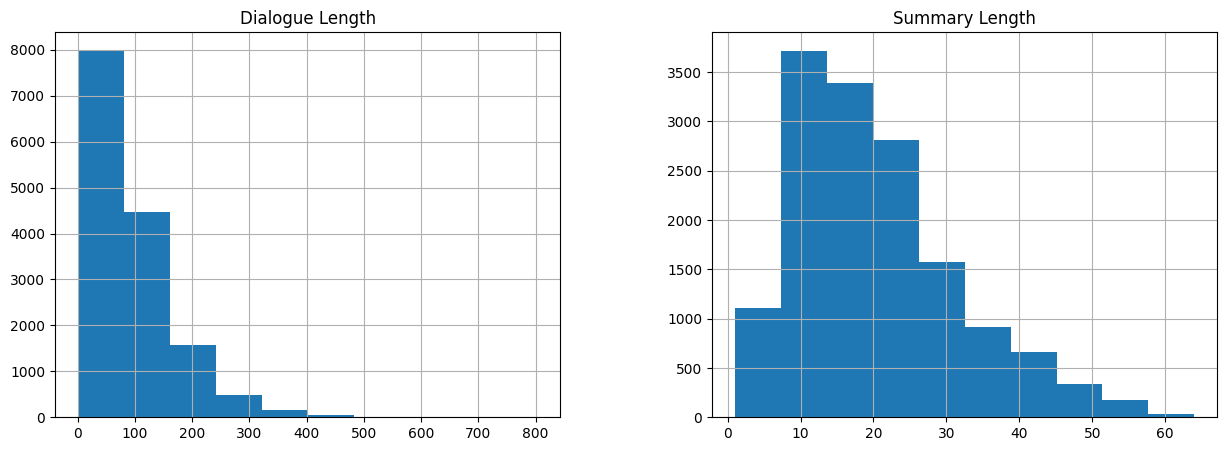

In [27]:
import pandas as pd

data = pd.DataFrame([dialogue_len, summary_len]).T
data.columns = ['Dialogue Length', 'Summary Length']

data.hist(figsize=(15,5))

In [28]:
# lets build Data Collator

def get_feature(batch):
  encodings = tokenizer(batch['dialogue'], text_target=batch['summary'],
                        max_length=1024, truncation=True)

  encodings = {'input_ids': encodings['input_ids'],
               'attention_mask': encodings['attention_mask'],
               'labels': encodings['labels']}

  return encodings

In [29]:
samsum_pt = samsum.map(get_feature, batched=True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [30]:
samsum_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [31]:
columns = ['input_ids', 'labels', 'attention_mask']
samsum_pt.set_format(type='torch', columns=columns)

In [32]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [33]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir = 'bart_samsum',
    num_train_epochs=1,
    warmup_steps = 500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay = 0.01,
    logging_steps = 10,
    evaluation_strategy = 'steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
)

trainer = Trainer(model=model, args=training_args, tokenizer=tokenizer, data_collator=data_collator,
                  train_dataset = samsum_pt['train'], eval_dataset = samsum_pt['validation'])

In [34]:
trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss


TrainOutput(global_step=230, training_loss=1.4828218460083007, metrics={'train_runtime': 1736.7366, 'train_samples_per_second': 8.483, 'train_steps_per_second': 0.132, 'total_flos': 8823772719611904.0, 'train_loss': 1.4828218460083007, 'epoch': 1.0})

In [38]:
trainer.save_model('bart_samsum_model')

In [39]:
# custome Dialogue Prediction

pipe = pipeline('summarization', model='bart_samsum_model')
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, "max_length": 128}

custom_dialogue="""
Laxmi Kant: what work you planning to give Tom?
Juli: i was hoping to send him on a business trip first.
Laxmi Kant: cool. is there any suitable work for him?
Juli: he did excellent in last quarter. i will assign new project, once he is back.
"""
print(pipe(custom_dialogue, **gen_kwargs)),trainer.save_model('bart_samsum_model')

Your max_length is set to 128, but your input_length is only 72. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)


[{'summary_text': "Juli wants to send Tom on a business trip first. She will assign him a new project once he is back. Tom did excellent in last quarter and she wants to give him more work. Laxmi Kant doesn't have any suitable work for him."}]


(None, None)

In [37]:
!zip bart_samsum.zip -r bart_samsum_model/

	zip warning: name not matched: bart_samsum_model/

zip error: Nothing to do! (try: zip -r bart_samsum.zip . -i bart_samsum_model/)
